In [1]:
%matplotlib notebook
import numpy as np
import galsim
from donutlib.makedonut import makedonut
from matplotlib import pyplot as plt

# Make donuts with donutlib and Galsim, and compare shapes

In [2]:
def donut_calc(zarray, r0):
    donut_zarray = [0,0,0]+zarray
    donutDict = {'writeToFits':False,
                 'iTelescope':2,
                 'nZernikeTerms':37,
                 'nbin':1024,
                 'nPixels':128,
                 'pixelOverSample':8,
                 'scaleFactor':2.0,
                 'rzero':r0,
                 'nEle':1.0e0, 
                 'background':0., 
                 'randomFlag':False,
                 'randomSeed':1234567890, 
                 'ZernikeArray':donut_zarray}
    return makedonut(**donutDict).make()

In [3]:
atm_psf = galsim.Kolmogorov(lam=700, r0=0.15)
aper = galsim.Aperture(diam=4.0, lam=700, circular_pupil=True, obscuration=0.4)
galsim_zarray = [0,0,0,0]+[27,0.5,0.5]
optics_psf = galsim.OpticalPSF(lam=700, diam=aper.diam, aper=aper, aberrations=galsim_zarray,pad_factor=2.)
psf = galsim.Convolve(optics_psf, atm_psf)
psf.drawImage(nx=128, ny=128, scale=0.2).array

/Users/roodman/Library/Python/3.7/lib/python/site-packages/galsim/errors.py:429: GalSimWarning: The calculated stepk (0.904135) for PhaseScreenPSF is smaller than what was used to build the wavefront (0.906599). This could lead to aliasing problems. Increasing pad_factor is recommended.
  warnings.warn(message, GalSimWarning)


array([[1.08864832e-07, 1.08959043e-07, 1.09141858e-07, ...,
        1.09113607e-07, 1.08941911e-07, 1.08859076e-07],
       [1.08958027e-07, 1.09053190e-07, 1.09237448e-07, ...,
        1.09206788e-07, 1.09034644e-07, 1.08951802e-07],
       [1.09139975e-07, 1.09236531e-07, 1.09423105e-07, ...,
        1.09390079e-07, 1.09216586e-07, 1.09133296e-07],
       ...,
       [1.09118957e-07, 1.09213303e-07, 1.09397426e-07, ...,
        1.09375080e-07, 1.09199568e-07, 1.09114303e-07],
       [1.08945464e-07, 1.09039235e-07, 1.09221958e-07, ...,
        1.09197998e-07, 1.09024590e-07, 1.08940519e-07],
       [1.08860661e-07, 1.08954396e-07, 1.09136685e-07, ...,
        1.09110729e-07, 1.08938600e-07, 1.08855346e-07]], dtype=float32)

In [4]:
aper = galsim.Aperture(lam=700, diam=8.36, obscuration=0.61, pad_factor=4.0, oversampling=0.5)
print(aper.illuminated.shape)
def galsim_calc(zarray, r0):
    atm_psf = galsim.Kolmogorov(lam=700, r0=r0)
    galsim_zarray = [0,0,0,0]+zarray
    optics_psf = galsim.OpticalPSF(lam=700, diam=aper.diam, aper=aper, aberrations=galsim_zarray)
    psf = galsim.Convolve(optics_psf, atm_psf)
    # AJR - change to return array with transformation x = -v and y = -u where x,y are Donut and u,v are Galsim
    # first return array with u -> -u and v -> -v, then transpose
    #return np.transpose(np.flip(psf.drawImage(nx=128, ny=128, scale=0.2).array))
    #return np.transpose(psf.drawImage(nx=128, ny=128, scale=0.2).array)
    return psf.drawImage(nx=128, ny=128, scale=0.2).array

(1024, 1024)


<IPython.core.display.Javascript object>


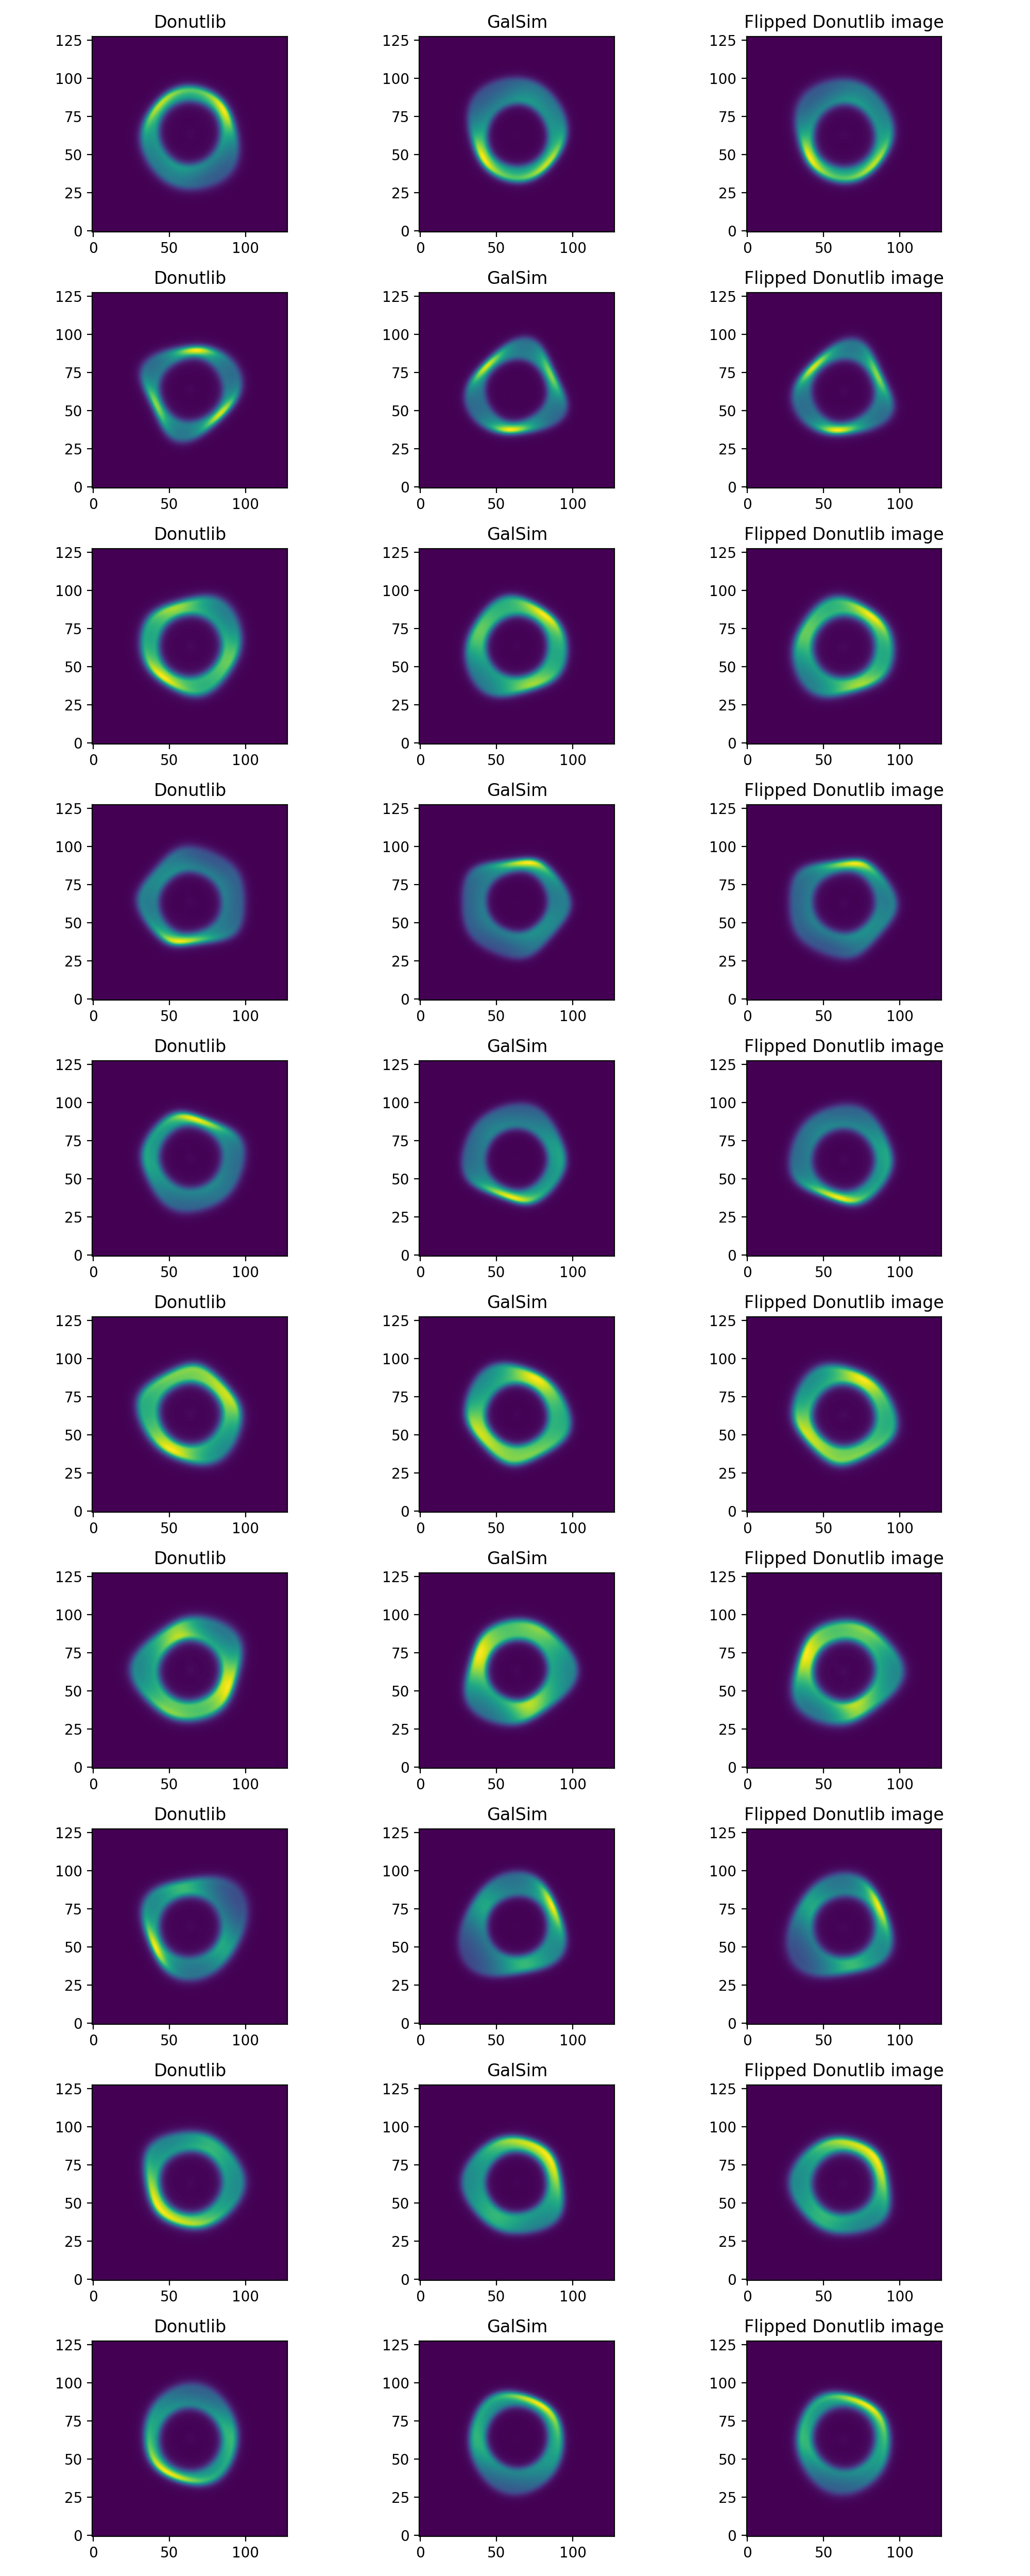

In [5]:
# compare donutlib vs. galsim vs. flip(donutlib), with the same zernike array

r0 = 0.2 # Pretty good seeing, corresponds to 0.7 arcsec at 700nm
gd = galsim.GaussianDeviate(12345)
z4 = 27.5
fig, axes = plt.subplots(10, 3, figsize=(10, 25))
for i in range(10):
    # Add Gaussian-distributed aberrations
    zarray = np.empty((17,), float)
    gd.generate(zarray)
    zarray = [z4]+list(0.2*zarray)
    donut_image = donut_calc(zarray, r0)
    galsim_image = galsim_calc(zarray, r0)
    axes[i, 0].imshow(donut_image,origin='lower')
    axes[i, 1].imshow(galsim_image,origin='lower')
    axes[i, 2].imshow(np.flip(donut_image),origin='lower')

    axes[i, 0].set_title("Donutlib")
    axes[i, 1].set_title("GalSim")
    axes[i, 2].set_title("Flipped Donutlib image")


fig.tight_layout()
fig.show()
# fig.savefig("comparison.png")

# Conclusions


1. using the same Zernike coefficient array, only a np.flip is needed to match shapes, as Josh found

2. I believe it is a difference in the sign of fourier transform in the Fraunhofer integral, which would flip in both axes. 
